<h1>Session 4. Sample solution of Homework 1 </h1>

<p>This notebook provides an example code of analyzing <b>Student's Final Grade</b> using linear regression. The dependent variable which to be used in OLS model is <b>Final_grade</b>. We would like to understand the realtionship between Final grade and other variables in the dataset and also reveal the best model using different selection methods and data transformations.
    
<br>The general sequence of steps for the analysis the following:
1. [Descriptive analysis](#pandas)
2.  [Modelling](#select)
4. [Running and building the OLS model using backward selection /statsmodels/ (model interpretation, test performance, diagnostics)](#stats)
5. [Running and building the OLS model using transformation /statsmodels/ (test performance, diagnostics)](#stats1)
6. [Choosing the best model in terms of exernal/internal validity (or both)](#resid)   

In [1]:
import pandas as pd #pandas for data manipulation, transformation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import numpy as np #for scientific computations
import statsmodels.api as sm #statsmodels library
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from sklearn.model_selection import train_test_split #for train and test split
from sklearn.metrics import r2_score #R-squared

 <h2>1.Descriptive analysis</h2> <a name="pandas"></a>

In [2]:
#importing the data and making a dataframe
data=pd.read_excel("Student_data.xlsx",sheet_name="Data")

In [3]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
StudentID      395 non-null int64
school2        395 non-null object
sex            395 non-null object
age            395 non-null int64
address        395 non-null object
famsize        395 non-null object
Pstatus        395 non-null object
Medu           395 non-null int64
Fedu           395 non-null int64
Mjob           395 non-null object
Fjob           395 non-null object
reason         395 non-null object
guardian       395 non-null object
traveltime     395 non-null int64
studytime      395 non-null int64
failures       395 non-null int64
schoolsup      395 non-null object
famsup         395 non-null object
paid           395 non-null object
activities     395 non-null object
nursery        395 non-null object
higher         395 non-null object
internet       395 non-null object
romantic       395 non-null object
famrel         395 non-null int64
freetime       395 non-null 

We have 32 variables of 395 observations.

In [4]:
#have a look at first rows of the dataframe
data.head()

,StudentID,school2,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,1,GP,F,18,U,GT3,A,4,4,at_home,...,no,no,4,3,4,1,1,3,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,...,yes,no,5,3,3,1,1,3,4,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,...,yes,no,4,3,2,2,3,3,10,10
3,4,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,3,2,2,1,1,5,2,15
4,5,GP,F,16,U,GT3,T,3,3,other,...,no,no,4,3,2,1,2,5,4,10


In [5]:
data.describe()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


We can see a lot of coded variables having values 1-5 (1 as lowest and 5 as highest). Thus there are a lot of categorical variables presented as numeric.

In [6]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 0
Single valued columns: Index([], dtype='object')


C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


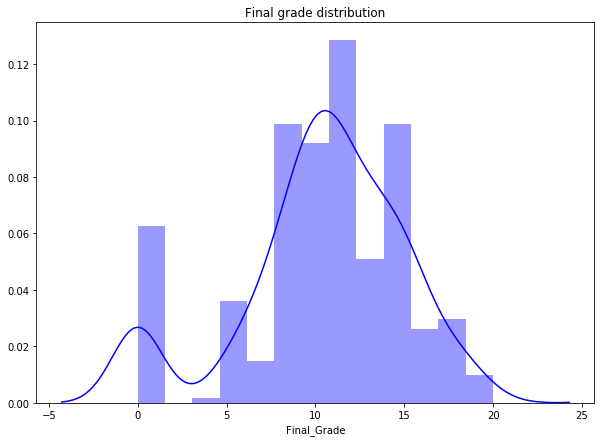

In [7]:
#let's visualise the distribution of final grades
plt.figure(figsize=(10,7))
sns.distplot(data.Final_Grade,color="blue")
plt.title("Final grade distribution")
plt.show()

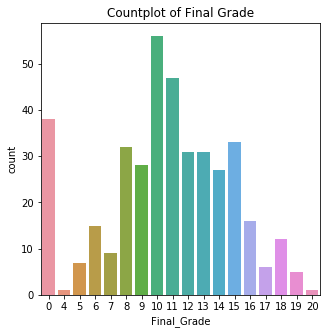

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(data.Final_Grade)
plt.title("Countplot of Final Grade")
plt.show()

Final grade distribution and countplot show that a lot of students (38) have 0 as a grade, making the distribution not normal.

 <h3>2.1.Descriptive analysis using visualization</h3>

<i><b>Let's outline some questions that might be insightful from Final Grade analytics point.</i></b>

     -Is Final Grade affected by the number of past failures of the subject and extra paid classes within the subject (failures and paid)? 
     -Relationship between Final grade and absences?
     -Final grade by age and romantic relationship?

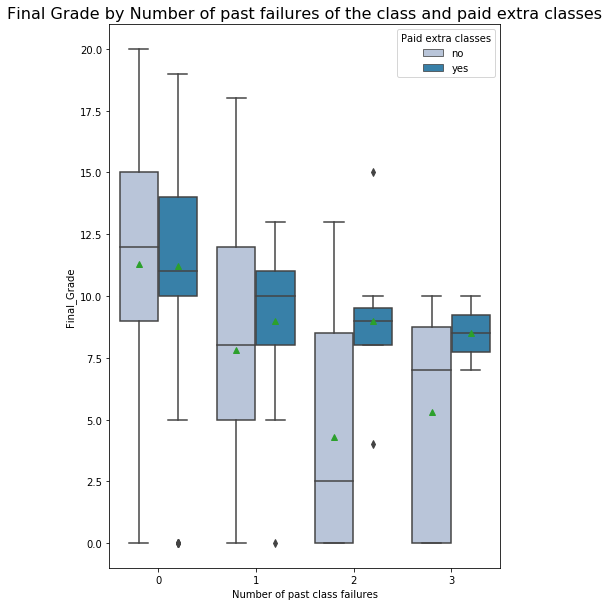

In [9]:
plt.figure(figsize=(7,10))
sns.boxplot(x="failures",y="Final_Grade", data=data, palette='PuBu',hue=data.paid,  showmeans=True)
plt.legend(title='Paid extra classes', loc='upper right')
plt.xlabel("Number of past class failures")
plt.title("Final Grade by Number of past failures of the class and paid extra classes",fontdict={"fontsize":16})
plt.show()

We can clearly see that failures of the class combined with the attendance of extra classes do affect the final grade. Plot indicates, that especially for students having 2 or 3 failures of the class and Not taking extra classes, the final grades are very low compared to the ones who paid and attended the extra classes.

In [10]:
#Mean difference between student grades having 0 and 3 failures
print ("Mean Final grade of students not taking extra class and having 3 failures:",data.Final_Grade[(data.failures==3)&(data.paid=="no")].mean())
print ("Mean Final grade of students taking extra class and having 3 failures:",data.Final_Grade[(data.failures==3)&(data.paid=="yes")].mean())


Mean Final grade of students not taking extra class and having 3 failures: 5.285714285714286
Mean Final grade of students taking extra class and having 3 failures: 8.5


As you see, mean difference is not small.

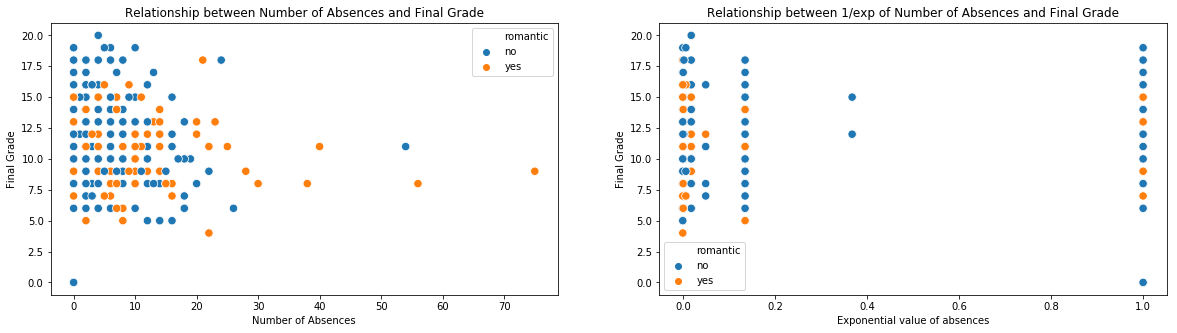

In [11]:
#Let's also see relationship between final grade and absences

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.scatterplot(data.absences,data.Final_Grade, hue=data.romantic,s=70)
plt.xlabel("Number of Absences")
plt.ylabel("Final Grade")
plt.title("Relationship between Number of Absences and Final Grade")

plt.subplot(1,2,2)
sns.scatterplot(np.exp(-data.absences),data.Final_Grade, hue=data.romantic,s=70)
plt.xlabel("Exponential value of absences")
plt.ylabel("Final Grade")
plt.title("Relationship between 1/exp of Number of Absences and Final Grade")


plt.show()

The scatterplot above indicates that the final grade is not affected by the number of absences. In particular, we can clearly see that majority of students have 0-20 absences and their grades are ranging between 5-20. 
However, by introducing a hue as being in a romantic relationship we can have the following insights:
    1. People with highest grades are Not in romantic relationships
    2. People having largest number of absences Are in a romantic relationship.
Also, based on my personal assumption, starting from some point the number of absences may affect students' performance. Non-linear relationship between final grade and absences can be seen from the scatterplot on the right and this can be also the reason for small correlation coefficinet (will check below). Thus since the relationship is not linear I will include (1/e^x) value of this variable(see, Final_Grade vs Exp(-absences) graph).

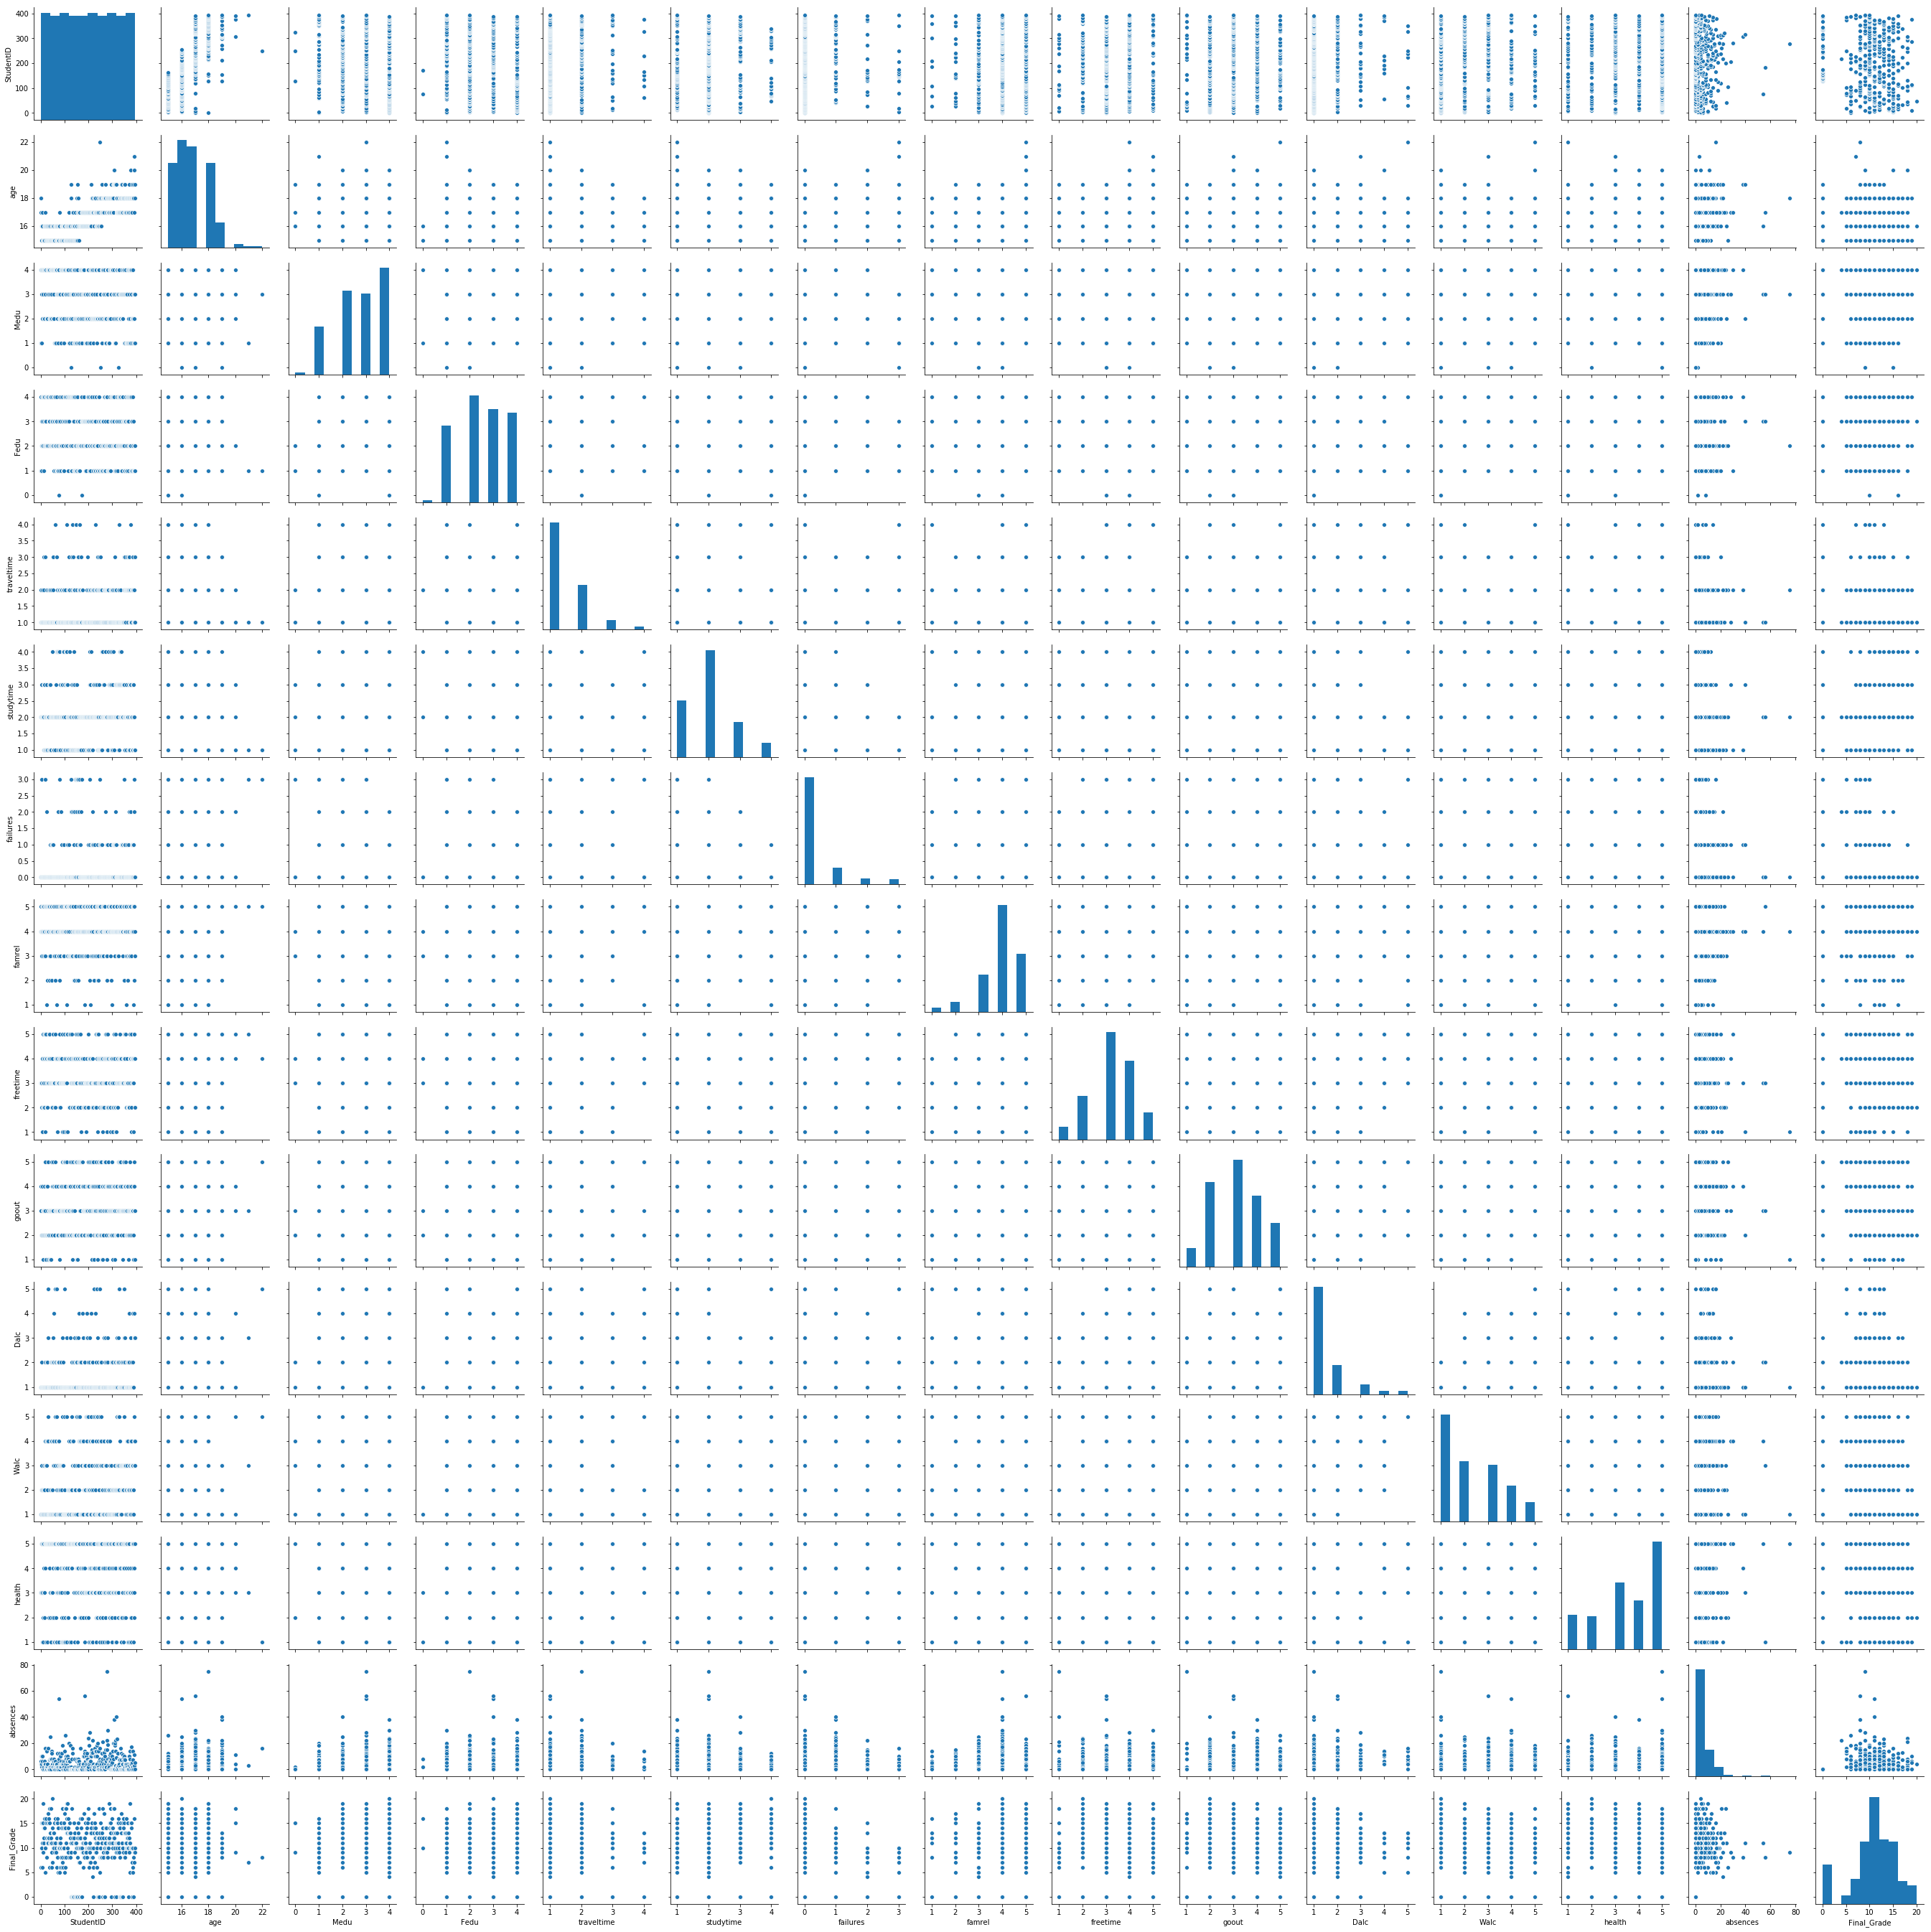

In [12]:
#To see the visual representation of pairwise relationships in a dataset, a pairplot is used. Note that it only plots numeric
#columns.
sns.pairplot(data)

We can clearly see that there are several variables relationship with which changes Final Grade significantly.
Those are failures, absences, Dalc, freetime. Thus we will consider including them in the model.


 <h3><u>Checking for correlations (multicollinearity)</u></h3>

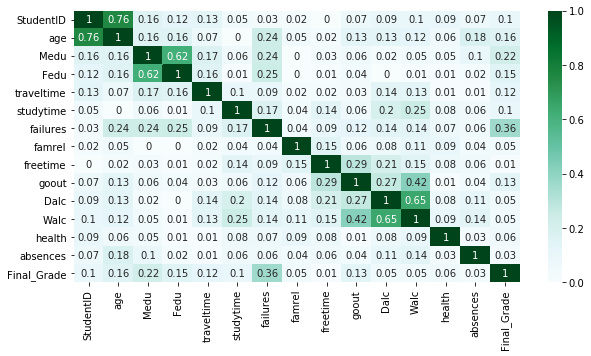

In [13]:
#Let's visualize correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "BuGn")

Highest correlation is between student ID and age, but we will not use ID in the model, thus let's observe other variables.
Dalc and Walc are highly correlated which is obvious as they represent alcohol consumption on weekdays and weekends.
We have correlation between Mother's and Father's education (Medu and Fedu). In order to keep one of them, let's
see which one of them has more impact on student's life. We can see the count of values for guardian column of the dataset and based on the prevailing value, keep the associated education level. E.g. we have more mother-guardians, thus will consider that column for the model.

In [14]:
#mothers are majority, thus it is more reasonable to keep Mother's education
data.guardian.value_counts()

mother    273
father     90
other      32
Name: guardian, dtype: int64

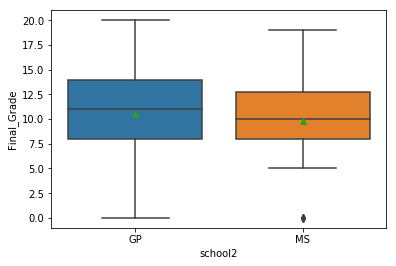

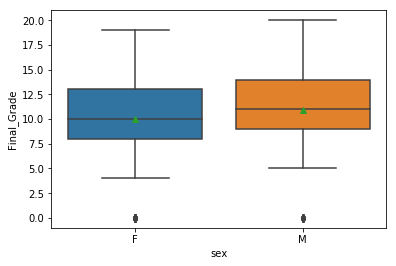

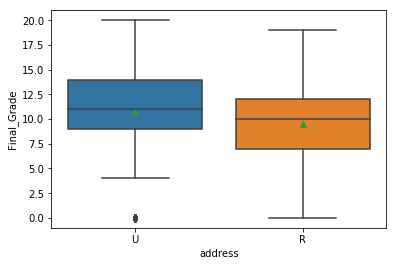

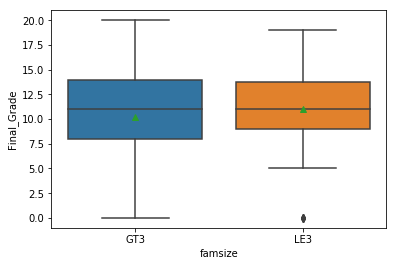

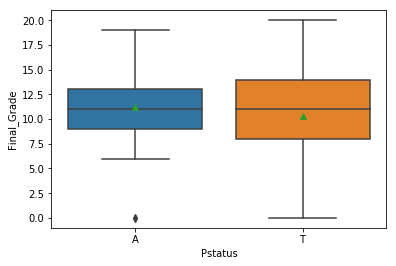

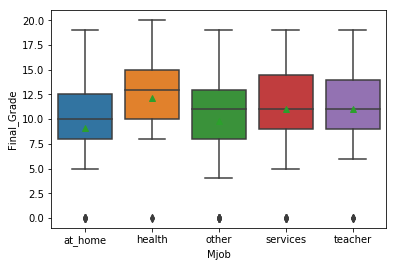

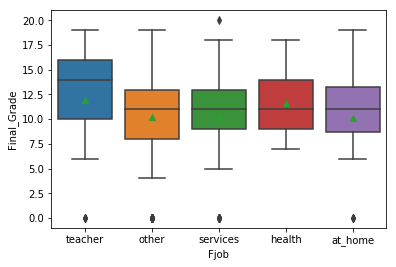

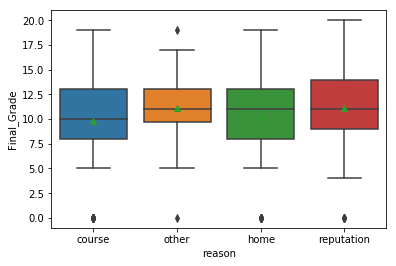

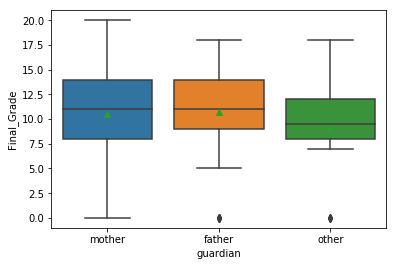

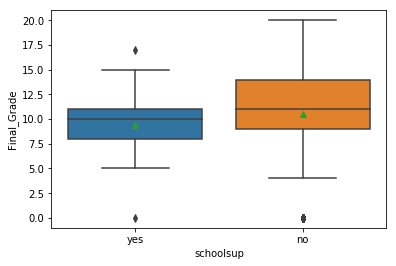

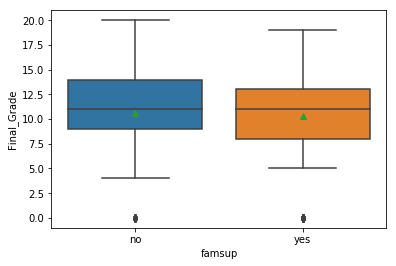

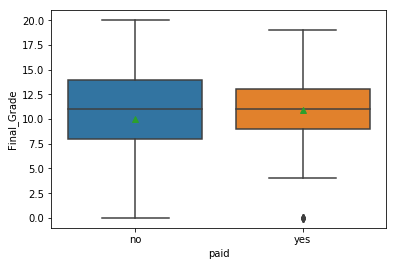

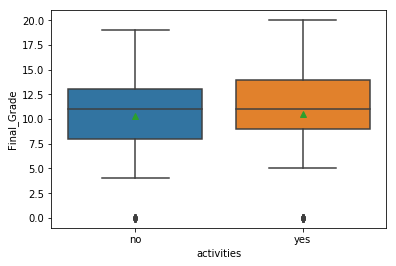

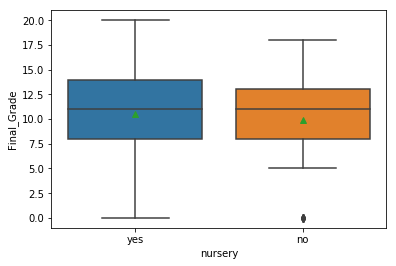

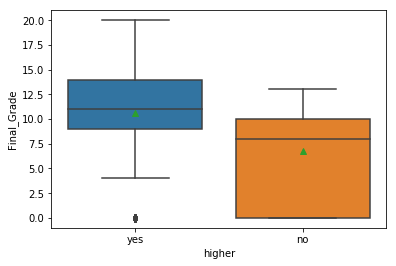

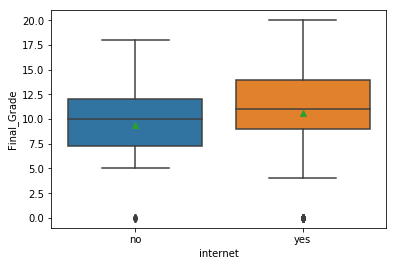

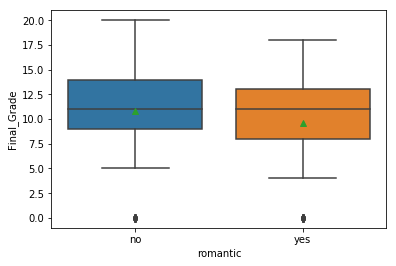

In [15]:
#Let's also see whether mean Final grade differs by any of the categorical variables.
#to see that, let's visualize Final grade by each categorical variable represented in boxplot.
for i in data.dtypes[data.dtypes=="O"].index.tolist():
    sns.boxplot(data=data,x=i,y="Final_Grade", showmeans=True)
    plt.show()

We can notice significant difference in final grades by address,Mjob at health level, Fjob teacher level,schoolsup,higher,internet. 

<h1> 2. Modelling </h1> <a name="select"> </a>

 The steps will be as following:
    1. Running the model for all variables,
    2. Using backward elimination to determine the most important variables,
    3. split the data into train and test sets,
    4. build(fit) the model on the train set and see the summary (look at R-squared),
    5. make predictions for the test set and calculate the R-squared,
    6. compare train-test score gap, analyse train model coefficients p-values and make the transformations,
    7. repeat until a desired score is got,
    8. in case of having several competing models (from test score similarity point), check assumptions for all models and    select the one holding all of them. If LINE is not held, transform the data further.
    9. NOTE: Coefficients are interpreted for the models fitted on training set.

In [16]:
#getting dummies and saving in a new df
data_new=pd.get_dummies(data,drop_first=True)

In [17]:
#transforming absences column
data_new.absences=np.exp(-data_new.absences)

In [18]:
#dropping studentID, as it is not explaining anything
data_new.drop("StudentID", axis=1, inplace=True)

In [19]:
#checking our data
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 40 columns):
age                  395 non-null int64
Medu                 395 non-null int64
Fedu                 395 non-null int64
traveltime           395 non-null int64
studytime            395 non-null int64
failures             395 non-null int64
famrel               395 non-null int64
freetime             395 non-null int64
goout                395 non-null int64
Dalc                 395 non-null int64
Walc                 395 non-null int64
health               395 non-null int64
absences             395 non-null float64
Final_Grade          395 non-null int64
school2_MS           395 non-null uint8
sex_M                395 non-null uint8
address_U            395 non-null uint8
famsize_LE3          395 non-null uint8
Pstatus_T            395 non-null uint8
Mjob_health          395 non-null uint8
Mjob_other           395 non-null uint8
Mjob_services        395 non-null uint8
Mjob_teacher 

In [20]:
#separating X and Y
Y=data_new["Final_Grade"]
X=data_new.drop("Final_Grade",axis=1)

In [21]:
#adding constant
X = sm.add_constant(X)

In [22]:
#running and building model with all variables
results1=sm.OLS(Y,X).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     4.681
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.07e-15
Time:                        02:06:10   Log-Likelihood:                -1079.2
No. Observations:                 395   AIC:                             2238.
Df Residuals:                     355   BIC:                             2398.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.4991      4.269      3.631      0.000       7.104      23.894
age                  -0.3987      0.205     -1.947      0.052      -0.801       0.004
Medu                  0.4480      0.306      1.464      0.144      -0.154       1.050
Fedu                  0.0579      0.267      0.217      0.828      -0.466       0.582
traveltime           -0.1362      0.324     -0.420      0.675      -0.774       0.501
studytime             0.5262      0.273      1.929      0.055      -0.010       1.063
failures             -1.5744      0.319     -4.937      0.000      -2.202      -0.947
famrel                0.3625      0.236      1.537      0.125      -0.101       0.826
freetime              0.3503      0.227      1.545      0.123      -0.096       0.796
goout                -0.7108      0.215     -3.308      0.001      -1.133      -0.288
Dalc                 -0.3049      0.316     -0.965      0.335      -0.926       0.316
Walc                  0.1689      0.237      0.714      0.476      -0.296       0.634
health               -0.1291      0.154     -0.839      0.402      -0.432       0.173
absences             -3.0026      0.484     -6.208      0.000      -3.954      -2.051
school2_MS            0.7433      0.749      0.993      0.322      -0.729       2.216
sex_M                 1.1064      0.474      2.333      0.020       0.174       2.039
address_U             0.7226      0.558      1.296      0.196      -0.374       1.819
famsize_LE3           0.5993      0.466      1.285      0.200      -0.318       1.517
Pstatus_T            -0.3571      0.688     -0.519      0.604      -1.710       0.996
Mjob_health           0.9740      1.064      0.916      0.361      -1.118       3.066
Mjob_other           -0.1645      0.682     -0.241      0.809      -1.505       1.176
Mjob_services         0.6668      0.762      0.876      0.382      -0.831       2.165
Mjob_teacher         -1.2642      0.990     -1.276      0.203      -3.212       0.684
Fjob_health           0.1444      1.372      0.105      0.916      -2.554       2.843
Fjob_other           -0.6807      0.977     -0.697      0.486      -2.601       1.240
Fjob_services        -0.3072      1.008     -0.305      0.761      -2.290       1.675
Fjob_teacher          1.0373      1.239      0.837      0.403      -1.399       3.474
reason_home           0.0697      0.524      0.133      0.894      -0.961       1.100
reason_other          0.4331      0.783      0.553      0.580      -1.106       1.972
reason_reputation     0.5668      0.548      1.034      0.302      -0.511       1.645
guardian_mother       0.0562      0.520      0.108      0.914      -0.966       1.079
guardian_other        0.4311      0.953      0.452      0.651      -1.444       2.306
schoolsup_yes        -1.6590      0.639     -2.597      0.010      -2.915

When we include all the variables in the model, R-squared is relatively high, but Adj. R-squared is considerably less than R-squared as there are many non-significant variables. Let's use backward stepwise selection to get better model.

In [23]:
#let's see what is left out of our X
X.head()

,const,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.0,18,4,4,2,2,0,4,3,4,...,1,0,1,0,0,0,1,1,0,0
1,1.0,17,1,1,1,2,0,5,3,3,...,0,0,0,1,0,0,0,1,1,0
2,1.0,15,1,1,1,2,3,4,3,2,...,1,0,1,0,1,0,1,1,1,0
3,1.0,15,4,2,1,3,0,3,2,2,...,1,0,0,1,1,1,1,1,1,1
4,1.0,16,3,3,1,2,0,4,3,2,...,0,0,0,1,1,0,1,1,0,0


In [24]:
#applying backward selection till the number of variables reaches 10.
rsq_list=[]
while X.shape[1]>10:
    model = sm.OLS(Y,X).fit()
    rsqs=[model.rsquared,model.rsquared_adj]
    rsq_list.append(rsqs)
    worst_covariate = model.pvalues[1:].idxmax()
    print("Should remove next ",worst_covariate, "with a p-value of", model.pvalues[worst_covariate])
    print("\n")
    X=X.drop(worst_covariate,axis=1)


Should remove next  Fjob_health with a p-value of 0.9162304199178354


Should remove next  guardian_mother with a p-value of 0.9160337610953942


Should remove next  reason_home with a p-value of 0.8984264206020718


Should remove next  nursery_yes with a p-value of 0.8275113758189347


Should remove next  Fedu with a p-value of 0.8356467772045092


Should remove next  Mjob_other with a p-value of 0.7938963617530111


Should remove next  traveltime with a p-value of 0.6444973542997483


Should remove next  guardian_other with a p-value of 0.6230844718328212


Should remove next  Fjob_services with a p-value of 0.5985643759943453


Should remove next  reason_other with a p-value of 0.5647052364603833


Should remove next  Pstatus_T with a p-value of 0.5515419676897515


Should remove next  paid_yes with a p-value of 0.5246234550355967


Should remove next  Walc with a p-value of 0.47091024030778705


Should remove next  Dalc with a p-value of 0.5577331949686843


Should remove next  int

In [25]:
#saving r-squared and r-squared adjusted into a dataframe
df=pd.DataFrame(rsq_list, columns = ['Rsq', 'Rsq_adj']) 

In [26]:
#adding a column of number of variables (we had 40, were left with 10, so adding range from 40 to 10, backward)
df["Number_of_vars"]=np.arange(40,10,-1)

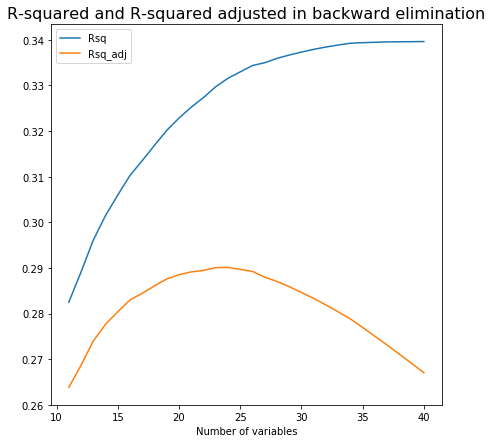

In [27]:
#Visually showing r-squared and r-squared adjusted
plt.figure(figsize=(7,7))
plt.plot(df.Number_of_vars,df.Rsq,)
plt.plot(df.Number_of_vars,df.Rsq_adj)
plt.legend(loc='upper left')
plt.xlabel("Number of variables")
plt.title("R-squared and R-squared adjusted in backward elimination",fontdict={"fontsize":16})
plt.show()

<h1> 3. Running and building the OLS model using backward selection /statsmodels/ (model interpretation, test performance, diagnostics) </h1> <a name="stats"> </a>

In [28]:
#splitting the data into train and test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.15, random_state=42)

In [29]:
#observing the results
results2=sm.OLS(Y0, X0).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     13.56
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.77e-18
Time:                        02:06:10   Log-Likelihood:                -929.50
No. Observations:                 335   AIC:                             1879.
Df Residuals:                     325   BIC:                             1917.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.6608      0.897     14.120      0.000      10.897      14.425
Medu              0.5692      0.218      2.611      0.009       0.140       0.998
failures         -1.8633      0.306     -6.094      0.000      -2.465      -1.262
goout            -0.5238      0.198     -2.641      0.009      -0.914      -0.134
absences         -2.8567      0.503     -5.680      0.000      -3.846      -1.867
Mjob_health       1.3736      0.802      1.712      0.088      -0.205       2.952
Mjob_services     1.0831      0.501      2.161      0.031       0.097       2.069
schoolsup_yes    -1.0896      0.642     -1.696      0.091      -2.353       0.174
famsup_yes       -1.0452      0.456     -2.291      0.023      -1.943      -0.148
romantic_yes     -0.9491      0.459     -2.066      0.040      -1.853      -0.045
==============================================================================
Omnibus:                        3.405   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                3.421
Skew:                          -0.245   Prob(JB):                        0.181
Kurtosis:                       2.926   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#predicting for train and test data
Y1_linear=results2.predict(sm.add_constant(X1))
Y0_linear=results2.predict(X0)

In [31]:
#let's see r-squared for train and test sets for the initial model
print("R-squared Train:",r2_score(Y0,Y0_linear))
print("R-squared Test:",r2_score(Y1,Y1_linear))

R-squared Train: 0.27295123114429254
R-squared Test: 0.27890059338272066


As we see, backward elimination provided quite a consistent model in terms of external validity. Let's check the internal validity.

### Interpretation of the results of Linear Regression
- <b>R-squared and F-statistics</b>: As Prob (F-statistic) shows our model is statistically significant at 5% significance level, so there is at least one estimated coefficient (besides intercept) that is not null. R-squared is a small number and it shows that 27.3% of variance in mean Final Grade is explained by the variables included in the model.
- <b>Adj. R-squared</b>: As summary shows it's a little bit below R-squared, 25.3% which indicates that there can be multicollinearity in the model.
- <b>Statistically significant variables</b>: As p-values of t-statistics show, only 2 variables are not significant at 5% sig. level (p<=0.05).
- <b>Coefficients (continous variable)</b>: Let's interpret for exp(-Absences). For each unit increase in 1/exp(absences) we will experience on average about -2.8567 units deacrease in mean Final grade.
- <b>Coefficients (categorical variable)</b>:Let's interpret for romantic. If a student has romantic relationship, then on average 0.9491 points decrease is expected in mean Final grade compared to case when he doesn't have a romantic relationship.

### Assumptions check of the model obtained via backward elimination

In [32]:
#residuals of the model
residuals1=results2.resid
predicted_values1=results2.predict()

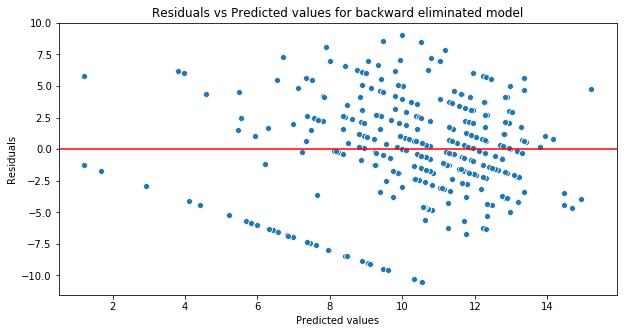

In [33]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
sns.scatterplot(predicted_values1,residuals1)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values for backward eliminated model")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


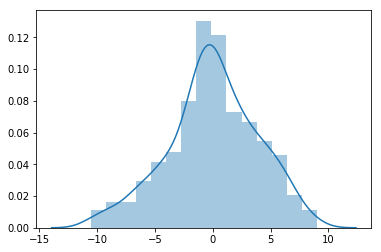

In [34]:
#Normality
#visual presentation- histogram
sns.distplot(residuals1)
plt.show()

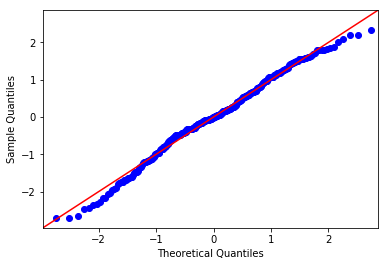

In [35]:
#QQ plot
qqplot(residuals1,fit=True, line='45')
plt.show()

<u>The plots indicate that although linerity assumption might be held, homoscedasticity and normality assumptions will most
probably be violated. Let's see the results using statistical tests.</u>

In [36]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results2)
print(list(zip(rnames, rainbow)))

[('fstat', 1.1210489503376917), ('p-value', 0.23443335205170784)]


Linearity assumption is held.

In [37]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals1, results2.model.exog)
print(list(zip(bnames, breush)))


[('Lagrange multiplier statistic', 85.60006248339594), ('p-value', 1.237972365284669e-14), ('f-value', 12.394202653920754), ('f p-value', 6.645508144777937e-17)]


Homoskedasticity assumption is violated.

In [38]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro_test=shapiro(residuals1)
print(list(zip(snames, shapiro_test)))

[('The test statistic', 0.9896069765090942), ('p-value', 0.017556563019752502)]


Normality assumption is also violated.

In [39]:
#defining colnames 
var=X.columns.tolist()

In [40]:
#Multicollinearity
#calculating vif using variance_inflation_factor() function from statsmodel
vif = [variance_inflation_factor(X[var].values, i) for i in range(0,len(var))]
print(vif)

[17.81324046700709, 1.1910851848502322, 1.115793474082645, 1.0468197932291718, 1.030135852753502, 1.1252839934965597, 1.0698520011578676, 1.032074561075709, 1.0575519935036224, 1.0251624902024032]


In [41]:
#printing vif values together with variable names
for i in range(0,len(var)):
    print(var[i],":",vif[i])

const : 17.81324046700709
Medu : 1.1910851848502322
failures : 1.115793474082645
goout : 1.0468197932291718
absences : 1.030135852753502
Mjob_health : 1.1252839934965597
Mjob_services : 1.0698520011578676
schoolsup_yes : 1.032074561075709
famsup_yes : 1.0575519935036224
romantic_yes : 1.0251624902024032


No multicollinearity

### Let's run the model with all the parameters selected via backward elimination, but sorting out the observations with "0" grades

In [42]:
#defining a dataframe without 0s
data_nz=data_new.drop(data_new[data_new.Final_Grade==0].index)

In [43]:
#we dropped 38 observations
data_nz.shape

(357, 40)

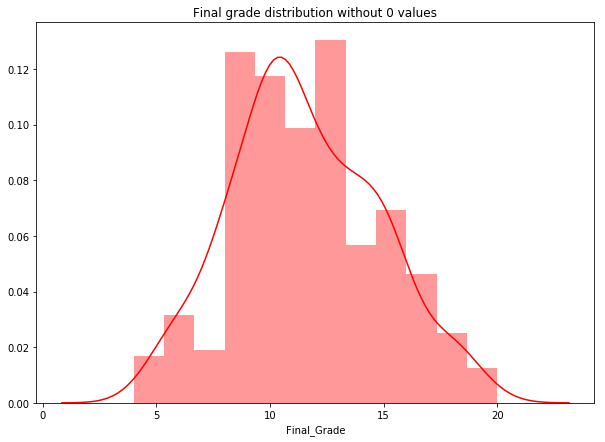

In [44]:
#let's visualise the distribution of final grades without 0 value
plt.figure(figsize=(10,7))
sns.distplot(data_nz.Final_Grade,color="red")
plt.title("Final grade distribution without 0 values")
plt.show()

We can see that distribution has been improved.

In [45]:
#Now let's perform the same steps with the columns used in backward selection.

In [46]:
#separating Y and X for non-zero Final grade data
Y_nz=data_nz["Final_Grade"]
X_nz=data_nz.drop("Final_Grade",axis=1)

In [47]:
#Adding constant 
X_nz = sm.add_constant(X_nz)

In [48]:
#observing the columns
X_nz.columns

Index(['const', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'school2_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [49]:
#outlining the columns selected via backward selection
X_nz=X_nz[X.columns]

In [50]:
#splitting the data into train and test sets
X0_nz, X1_nz, Y0_nz, Y1_nz = train_test_split(X_nz, Y_nz, test_size=0.1, random_state=42)

In [51]:
#running and building model with all variables
results3=sm.OLS(Y0_nz,X0_nz).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     10.81
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.26e-14
Time:                        02:06:12   Log-Likelihood:                -788.42
No. Observations:                 321   AIC:                             1597.
Df Residuals:                     311   BIC:                             1635.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4504      0.667     18.674      0.000      11.139      13.762
Medu              0.2459      0.156      1.571      0.117      -0.062       0.554
failures         -1.1967      0.254     -4.718      0.000      -1.696      -0.698
goout            -0.4145      0.154     -2.690      0.008      -0.718      -0.111
absences          1.0736      0.406      2.642      0.009       0.274       1.873
Mjob_health       1.4775      0.598      2.471      0.014       0.301       2.654
Mjob_services     1.4077      0.379      3.714      0.000       0.662       2.154
schoolsup_yes    -2.1036      0.460     -4.569      0.000      -3.009      -1.198
famsup_yes       -0.6361      0.338     -1.884      0.060      -1.300       0.028
romantic_yes     -0.2763      0.349     -0.793      0.429      -0.962       0.410
==============================================================================
Omnibus:                        3.651   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.129
Skew:                           0.150   Prob(JB):                        0.209
Kurtosis:                       2.621   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
Y0_linear_nz=results3.predict(X0_nz)
Y1_linear_nz=results3.predict(X1_nz)

In [53]:
#let's see r-squared for train and test sets for the initial model
print("R-squared Train:",r2_score(Y0_nz,Y0_linear_nz))
print("R-squared Test:",r2_score(Y1_nz,Y1_linear_nz))

R-squared Train: 0.2382654182571895
R-squared Test: 0.2239756893968443


The results of building and running the model for data with non-zero Final grades are constant in terms of small difference between r-squared and r-squared adjusted and external validity. However, the previous results (based on the data including 0 final grades) were better. This can be due to the small training dataset, since we have deleted aroung 9% of observations.
Let's however check whether exlusion of 0s has improved model in terms of internal validity.
We will use stat tests only.

In [54]:
#residuals of the model
residuals_nz=results3.resid
predicted_values_nz=results3.predict()

In [55]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results3)
print(list(zip(rnames, rainbow)))

[('fstat', 0.7603850543363218), ('p-value', 0.9560076296911022)]


In [56]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals_nz, results3.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 14.982105381444475), ('p-value', 0.09142868531272907), ('f-value', 1.6917800689172535), ('f p-value', 0.09008324358676226)]


In [57]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapiro_test=shapiro(residuals_nz)
print(list(zip(snames, shapiro_test)))

[('The test statistic', 0.9947968125343323), ('p-value', 0.3504693806171417)]


In [58]:
#defining colnames 
var_nz=X_nz.columns.tolist()

In [59]:
#Multicollinearity
#calculating vif using variance_inflation_factor() function from statsmodel
vif_nz = [variance_inflation_factor(X_nz[var_nz].values, i) for i in range(0,len(var_nz))]
print(vif_nz)

[17.7999319202711, 1.1764806417249607, 1.1168044082900126, 1.0614216215813472, 1.0499924988036937, 1.1254730958054986, 1.0788858151649943, 1.028626438993529, 1.0581493936256352, 1.0237185387595595]


In [60]:
#printing vif values together with variable names
for i in range(0,len(var_nz)):
    print(var_nz[i],":",vif_nz[i])

const : 17.7999319202711
Medu : 1.1764806417249607
failures : 1.1168044082900126
goout : 1.0614216215813472
absences : 1.0499924988036937
Mjob_health : 1.1254730958054986
Mjob_services : 1.0788858151649943
schoolsup_yes : 1.028626438993529
famsup_yes : 1.0581493936256352
romantic_yes : 1.0237185387595595


##### Although the linear regression model based on only non-zero observations had lower results in terms of external validity, it outperforms the previous model in terms of internal validity. In other words, this model holds ALL the LINE assumptions.

<h1> 4. Running and building the OLS model using transformation /statsmodels/ (test performance, diagnostics) </h1> <a name="stats1"> </a>

###### Now let's try to transform the model and see whether the transformed model will do better than backward eliminated one in terms of internal and external validity

In [61]:
#Dalc and Walc are representing Daily and Weekly Alcohol consumption. Let's make a new 
#column representing weekly alcohol consumption, made of summing up the noted variables weighted by share of weekdays and weekend, respectively(5/7,2/7)
data["Alcohol"]=5/7*data["Dalc"]+2/7*data["Walc"]

#freetime is the free time after school
#goout is time spent with friends.
#these two are kind of similar, assuming you spend time with friends when you have free time
#thus we will merge them by taking mean of the two columns
data["Freetime"]=data[['freetime', 'goout']].mean(axis=1)

In [62]:
#separating X and Y
Y_tr = data.Final_Grade
X_tr = data.drop(["Final_Grade"],axis=1)

In [63]:
#let's only selected some variables as discussed above and build model on them
selected_covariates = ["failures", "absences", "Alcohol", "Freetime","Medu","address","Mjob","Fjob", "schoolsup", "higher", "internet",
                       "age"]

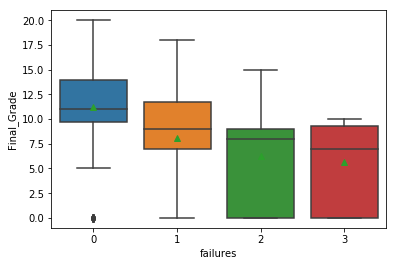

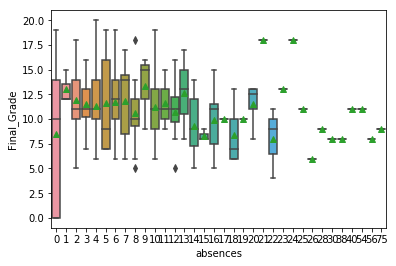

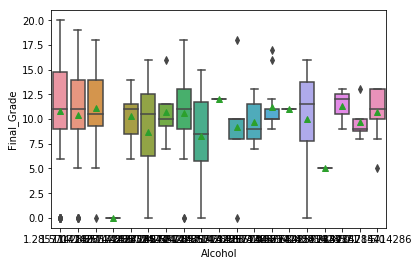

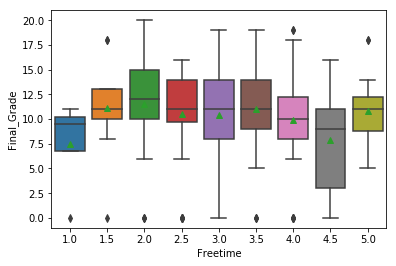

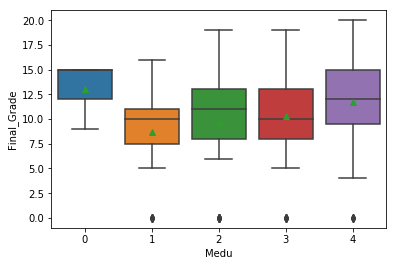

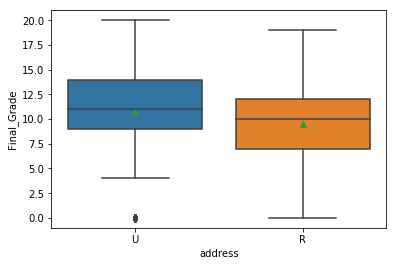

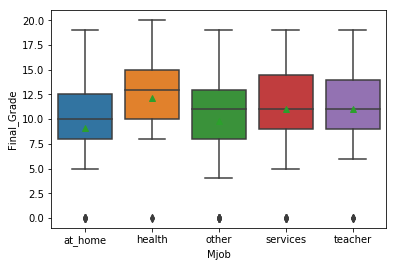

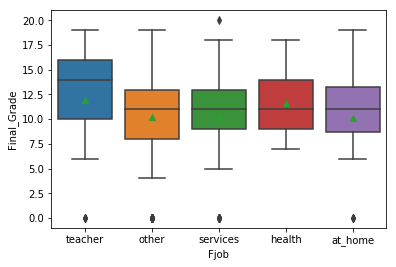

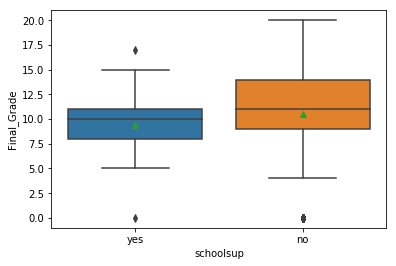

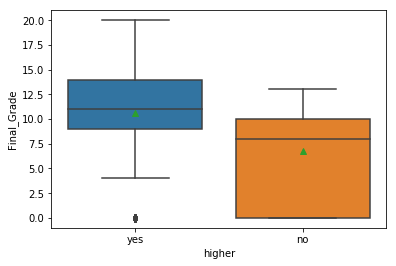

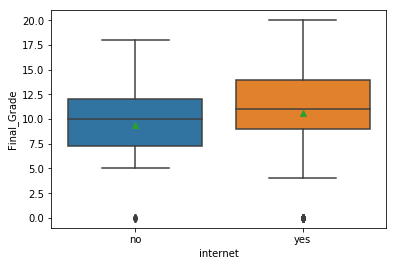

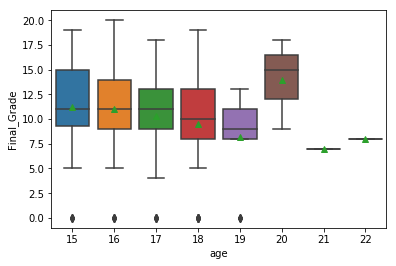

In [64]:
#let's see that all selected covariates or some of their subcategories have impact on final grade
for i in selected_covariates:
    sns.boxplot(data=data,x=i,y="Final_Grade", showmeans=True)
    plt.show()

In [65]:
#outlining data with only selected covariates
X_tr = X_tr[selected_covariates]

In [66]:
#transforming the selected covariates
X_tr["Fjob_teacher"] = np.where(X_tr.Fjob=="teacher",1,0)
X_tr["Mjob_health"] = np.where(X_tr.Mjob=="health",1,0)
X_tr["Failures_0"] = np.where(X_tr.failures==0,1,0)
X_tr["Medu"] = np.where(X_tr.Medu==0,1,0)
X_tr["absences"]=np.exp(-data.absences)

In [67]:
X_tr.columns

Index(['failures', 'absences', 'Alcohol', 'Freetime', 'Medu', 'address',
       'Mjob', 'Fjob', 'schoolsup', 'higher', 'internet', 'age',
       'Fjob_teacher', 'Mjob_health', 'Failures_0'],
      dtype='object')

In [68]:
#droping the initial columns which we transformed
dropouts=["Fjob", "Mjob","failures", "Medu"]
X_tr.drop(dropouts, axis=1, inplace=True)

In [69]:
X_tr.head()

,absences,Alcohol,Freetime,address,schoolsup,higher,internet,age,Fjob_teacher,Mjob_health,Failures_0
0,0.002479,1.000000,3.5,U,yes,yes,no,18,1,0,1
1,0.018316,1.000000,3.0,U,no,yes,yes,17,0,0,1
2,0.000045,2.285714,2.5,U,yes,yes,yes,15,0,0,0
3,0.135335,1.000000,2.0,U,no,yes,yes,15,0,1,1
4,0.018316,1.285714,2.5,U,no,yes,no,16,0,0,1


In [70]:
#getting dummies
X_tr = pd.get_dummies(X_tr,drop_first=True)

In [71]:
#adding constraint to X
X_tr=sm.add_constant(X_tr)

In [72]:
#splitting the data into train and test sets
X0_tr, X1_tr, Y0_tr, Y1_tr = train_test_split(X_tr, Y_tr, test_size=0.15, random_state=42)

In [73]:
#observing the results
results_tr=sm.OLS(Y0_tr, X0_tr).fit()
results_tr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     9.276
Date:                Sun, 06 Oct 2019   Prob (F-statistic):           1.77e-14
Time:                        02:06:18   Log-Likelihood:                -936.91
No. Observations:                 335   AIC:                             1898.
Df Residuals:                     323   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8444      3.835      2.828      0.005       3.300      18.389
absences         -2.9720      0.524     -5.669      0.000      -4.003      -1.941
Alcohol          -0.2647      0.269     -0.984      0.326      -0.794       0.264
Freetime         -0.2415      0.274     -0.880      0.379      -0.781       0.298
age              -0.1981      0.193     -1.027      0.305      -0.577       0.181
Fjob_teacher      0.9664      0.879      1.100      0.272      -0.762       2.695
Mjob_health       0.8867      0.788      1.125      0.261      -0.664       2.438
Failures_0        3.0411      0.581      5.235      0.000       1.898       4.184
address_U         0.4084      0.559      0.731      0.465      -0.691       1.508
schoolsup_yes    -1.4388      0.681     -2.113      0.035      -2.779      -0.099
higher_yes        1.9292      1.035      1.864      0.063      -0.107       3.966
internet_yes      0.5844      0.619      0.945      0.346      -0.633       1.802
==============================================================================
Omnibus:                        2.851   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.894
Skew:                          -0.222   Prob(JB):                        0.235
Kurtosis:                       2.896   Cond. No.                         303.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
#predicting for train and test data
Y1_linear_tr=results_tr.predict(sm.add_constant(X1_tr))
Y0_linear_tr=results_tr.predict(X0_tr)

In [75]:
#let's see r-squared for train and test sets for the initial model
print("R-squared Train:",r2_score(Y0_tr,Y0_linear_tr))
print("R-squared Test:",r2_score(Y1_tr,Y1_linear_tr))

R-squared Train: 0.24006170521965853
R-squared Test: 0.23758240381718276


Let's check internal validity for transformed model.

In [76]:
#residuals of the model
residuals_tr=results_tr.resid
predicted_values_tr=results_tr.predict()

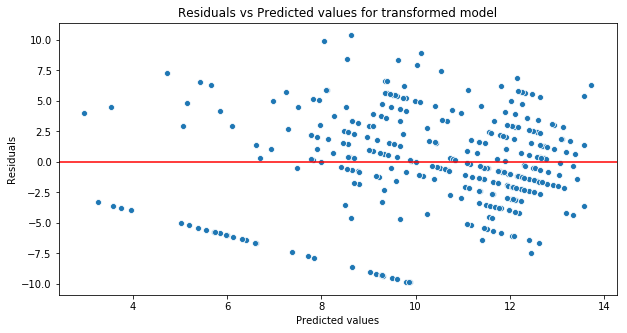

In [77]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
sns.scatterplot(predicted_values_tr,residuals_tr)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values for transformed model")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

We can see randomness in scattering of the points, but the variance is not constant. This hints us that Linearity assumption might be held, but homoscedasticity is not. Let's check via statistical tests.

C:\Users\Srbuhi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


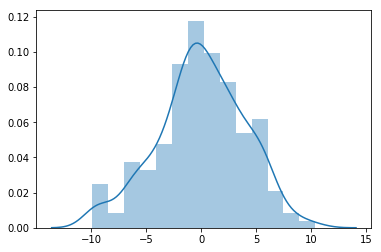

In [78]:
#Normality
#visual presentation- histogram
sns.distplot(residuals_tr)
plt.show()

According to the distribution of residuals, the normality assumption is not held.

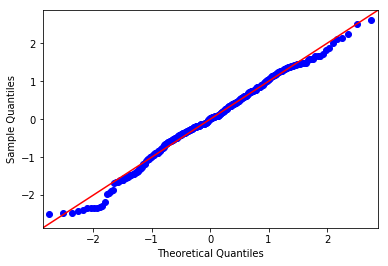

In [79]:
#QQ plot
qqplot(residuals_tr,fit=True, line='45')
plt.show()

Normality assumption is also not held because of the fluctuations of the end points.

In [80]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames_tr=["fstat", "p-value"]
rainbow_tr=linear_rainbow(results_tr)
print(list(zip(rnames_tr, rainbow_tr)))

[('fstat', 1.1868704446919318), ('p-value', 0.13962511265645003)]


Linearity assumption is held at 5% significance level (p-value=0.38>0.05).

In [81]:
#Breusch-Pagan test for homoscedasticity
#The null hypothesis assumes homoskedasticity
bnames_tr = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush_tr = het_breuschpagan(residuals_tr, results_tr.model.exog)
print(list(zip(bnames_tr, breush_tr)))


[('Lagrange multiplier statistic', 92.40075719470582), ('p-value', 5.635296842104214e-15), ('f-value', 11.183968270534058), ('f p-value', 1.3514670548656422e-17)]


We reject the null hypothesis based on 5% significance level, thus homoscedasticity assumption is not held.

In [82]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames_tr=['The test statistic', 'p-value']
shapiro_tr=shapiro(residuals_tr)
print(list(zip(snames_tr, shapiro_tr)))

[('The test statistic', 0.990424394607544), ('p-value', 0.02782595157623291)]


Test confirms that the data was not drawn from a normal distribution.

In [83]:
#defining colnames 
var_tr=X_tr.columns.tolist()

In [84]:
#Multicollinearity
#calculating vif using variance_inflation_factor() function from statsmodel
vif_tr = [variance_inflation_factor(X_tr[var_tr].values, i) for i in range(0,len(var))]
print(vif_tr)

[302.40737435817294, 1.0522129826356341, 1.2156968583087844, 1.172449433645249, 1.2463747880789544, 1.0163707484971072, 1.0361109496323397, 1.174639934356057, 1.0973631366145802, 1.1005378333770168]


As we see there is no multicollinearity issue for this model.

In [101]:
results_summary=pd.DataFrame({"R-squared Train":rsq_train,"R-squared Test":rsq_test, "Linear Regression assumptions":["partially held", "all held","partially held"]},
                             index=["Backward selection based model", "Model with Final Grades greater than 0",
                                    "Transformed model"])
results_summary

,R-squared Train,R-squared Test,Linear Regression assumptions
Backward selection based model,0.272951,0.278901,partially held
Model with Final Grades greater than 0,0.238265,0.223976,all held
Transformed model,0.240062,0.237582,partially held


## CONCLUSION: <a name="resid"> </a>
We tried 3 main approaches to find a good OLS model.
1. We run the model with all variables, applied backward selection and obtained 0.27 r-squared on both train and test sets.
   However, this model lacked meeting Normality and Variance Equality assumptions.
2. We dropped all the observations with "0" final grade and re-run the model with covariates based on backward elimination 
   results. For this non-zero Final grade model we obtained 0.238 and 0.223 r-squared on train and test sets, respectively.
   This model met all assumptions of Linear Regression model.
3. Finally, we transformed some variables and run the OLS regression on the initial data, including observations with final 
   grade as 0. Here we got 0.24 and 0.237 r-squared on train and test sets, respectively.
   Transformed model didn't meet Normality and Variance Equality assumptions.
As a conclusion, we will choose the model based on the analysis needs. If the aim is predicting student's final grade, we will go with the first model. If the goal is revealing the factors affecting student's final grade, we will use second model, which met all the assumptions.

We interpreted results of the model with highest r-squared, which can be found under that model's summary.